# Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from amalearn.reward import *
from amalearn.environment import *
from amalearn.agent import *

In [3]:
a = 7
b = a - 2
c = b - 1
d = 6

In [4]:
# --------------
# Debugging Cell
# --------------

# build a fake agent for testing and set some initial conditions
np.random.seed(1)
rewards = [ConstantReward(1) for _ in range(4)]
env = MutliArmedBanditEnvironment(rewards, len(rewards), '1')
greedy_agent = EpsilonGreedyAgent('1', env, 0, False, 0, [0, 0, 0.5, 0])
greedy_agent.arm_count = [0, 1, 0, 0]

obs, r, d, info = greedy_agent.take_action()

assert (greedy_agent.q_values == np.array([0, 0, 1, 0])).all()
assert (greedy_agent.arm_count == np.array([0, 1, 1, 0])).all()

greedy_agent.q_values = np.array([0.49, 0.3, 0.5, 0.499])
obs, r, d, info = greedy_agent.take_action()

assert (greedy_agent.q_values == np.array([0.49, 0.3, 0.75, 0.499])).all()
assert (greedy_agent.arm_count == np.array([0, 1, 2, 0])).all()

1:	action=2
2:	action=2


In [5]:
# --------------
# Debugging Cell
# --------------

# build a fake agent for testing and set some initial conditions
np.random.seed(1)
rewards = [ConstantReward(1) for _ in range(4)]
env = MutliArmedBanditEnvironment(rewards, len(rewards), '1')
gradient_agent = EpsilonGradientAgent('1', env, 0)
gradient_agent.h_values = np.array([1, 1, 1, 1])


obs, r, d, info = gradient_agent.take_action()

assert (gradient_agent.p_values == np.array([0.25, 0.25, 0.25, 0.25])).all()
assert (gradient_agent.h_values == np.array([1, 1, 1, 1])).all()

gradient_agent.h_values = np.array([1, 0.2, 0.8, 0.4])
gradient_agent.arm_count = np.array([0, 0, 0, 0])

obs, r, d, info = gradient_agent.take_action()

assert np.argmax(gradient_agent.p_values) == 0
assert (gradient_agent.arm_count == np.array([1, 0, 0, 0])).all()

1:	action=2
2:	action=0


## 1)

In [6]:
means = [a, b, c]
stds = [1, 2, 1]
rewards = [GaussianReward(mean, std) for mean, std in zip(means, stds)]
rewards.append(GaussianUnifromReward(d, 2, -d, 1, 0.7, 0.3))

num_runs = 20                 
num_steps = 1000

1:	action=1
1:	action=2
1:	action=3
2:	action=1
2:	action=3
2:	action=3
3:	action=1
3:	action=2
3:	action=0
4:	action=1
4:	action=1
4:	action=1
5:	action=1
5:	action=3
5:	action=1
6:	action=1
6:	action=2
6:	action=2
7:	action=1
7:	action=2
7:	action=0
8:	action=1
8:	action=2
8:	action=0
9:	action=1
9:	action=1
9:	action=2
10:	action=1
10:	action=2
10:	action=0
11:	action=1
11:	action=2
11:	action=2
12:	action=0
12:	action=1
12:	action=1
13:	action=0
13:	action=1
13:	action=0
14:	action=0
14:	action=1
14:	action=0
15:	action=0
15:	action=1
15:	action=0
16:	action=0
16:	action=1
16:	action=0
17:	action=0
17:	action=0
17:	action=0
18:	action=0
18:	action=0
18:	action=0
19:	action=0
19:	action=0
19:	action=0
20:	action=0
20:	action=1
20:	action=0
21:	action=0
21:	action=1
21:	action=3
22:	action=3
22:	action=0
22:	action=0
23:	action=0
23:	action=1
23:	action=0
24:	action=0
24:	action=0
24:	action=0
25:	action=0
25:	action=0
25:	action=0
26:	action=0
26:	action=0
26:	action=0
27:	action=0


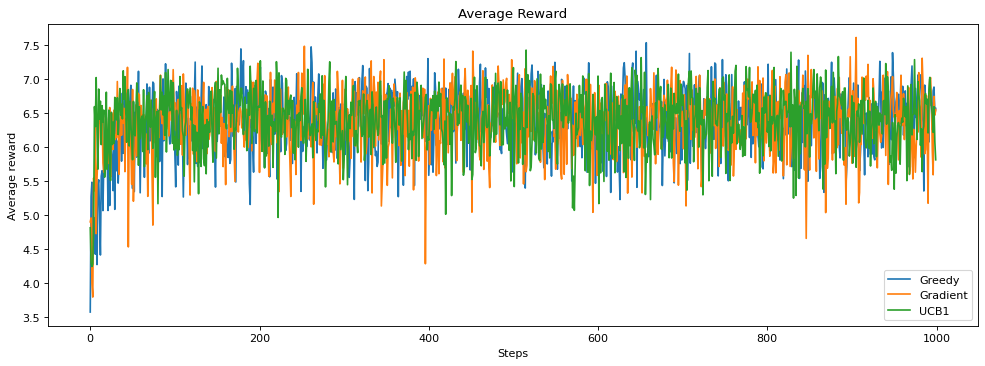

In [7]:
greedy_rewards = np.zeros((num_runs, num_steps))
gradient_rewards = np.zeros((num_runs, num_steps))
ucb1_rewards = np.zeros((num_runs, num_steps))

epsilon = 0.2
stepsize = 0.1
stepsize_constant = False


for run in range(num_runs):
    np.random.seed(run)
    env1 = MutliArmedBanditEnvironment(rewards, num_steps, '1')
    env2 = MutliArmedBanditEnvironment(rewards, num_steps, '2')
    env3 = MutliArmedBanditEnvironment(rewards, num_steps, '3')
    greedy_agent = EpsilonGreedyAgent('1', env1, epsilon, stepsize_constant, stepsize)
    gradient_agent = EpsilonGradientAgent('2', env2, epsilon, stepsize_constant, stepsize)
    ucb1_agent = EpsilonUCB1Agent('3', env3, epsilon, stepsize_constant, stepsize)


    for i in range(num_steps):
        obs, r, d, info = greedy_agent.take_action()
        greedy_rewards[run, i] = r
        obs, r, d, info = gradient_agent.take_action()
        gradient_rewards[run, i] = r
        obs, r, d, info = ucb1_agent.take_action()
        ucb1_rewards[run, i] = r

greedy_scores = np.mean(greedy_rewards, axis=0)
gradient_scores = np.mean(gradient_rewards, axis=0)
ucb1_scores = np.mean(ucb1_rewards, axis=0)

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
# plt.plot([average_best / num_runs for _ in range(num_steps)], linestyle="--")
plt.plot(greedy_scores)
plt.plot(gradient_scores)
plt.plot(ucb1_scores)
plt.legend(["Greedy", "Gradient", "UCB1"])
plt.title("Average Reward")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()

### a)

### b)